In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/content/gdrive/MyDrive/robot_intelligence/mnist_train.csv',header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/robot_intelligence/mnist_test.csv',header = None)

train_data = train_data.to_numpy() #28*28画素の訓練データ60000個 左端列が正解ラベル
test_data = test_data.to_numpy() #28*28画素のテストデータ10000個 左端列が正解ラベル

train_data_in = train_data[:,1:]/255 #訓練データの入力値(0から1の浮動小数)
test_data_in = test_data[:,1:]/255 #テストデータの入力値(0から1の浮動小数)

#訓練データの正解ラベルを4bitで表現
train_label=[]
for i in range(train_data.shape[0]):
  if train_data[i,0] == 0:
    train_label.append(np.array([0,0,0,0]))
  elif train_data[i,0] == 1:
    train_label.append(np.array([0,0,0,1]))
  elif train_data[i,0] == 2:
    train_label.append(np.array([0,0,1,0]))
  elif train_data[i,0] == 3:
    train_label.append(np.array([0,0,1,1]))
  elif train_data[i,0] == 4:
    train_label.append(np.array([0,1,0,0]))
  elif train_data[i,0] == 5:
    train_label.append(np.array([0,1,0,1]))
  elif train_data[i,0] == 6:
    train_label.append(np.array([0,1,1,0]))
  elif train_data[i,0] == 7:
    train_label.append(np.array([0,1,1,1]))
  elif train_data[i,0] == 8:
    train_label.append(np.array([1,0,0,0]))
  elif train_data[i,0] == 9:
    train_label.append(np.array([1,0,0,1]))

train_label = np.array(train_label)

#テストデータの正解ラベルを4bitで表現
test_label=[]
for i in range(test_data.shape[0]):
  if test_data[i,0] == 0:
    test_label.append(np.array([0,0,0,0]))
  elif test_data[i,0] == 1:
    test_label.append(np.array([0,0,0,1]))
  elif test_data[i,0] == 2:
    test_label.append(np.array([0,0,1,0]))
  elif test_data[i,0] == 3:
    test_label.append(np.array([0,0,1,1]))
  elif test_data[i,0] == 4:
    test_label.append(np.array([0,1,0,0]))
  elif test_data[i,0] == 5:
    test_label.append(np.array([0,1,0,1]))
  elif test_data[i,0] == 6:
    test_label.append(np.array([0,1,1,0]))
  elif test_data[i,0] == 7:
    test_label.append(np.array([0,1,1,1]))
  elif test_data[i,0] == 8:
    test_label.append(np.array([1,0,0,0]))
  elif test_data[i,0] == 9:
    test_label.append(np.array([1,0,0,1]))

test_label = np.array(test_label)


In [ ]:
import math
#活性化関数（シグモイド関数）
def sigmoid(a,x):
  return 1/(1 + math.exp(-a*x))

#シグモイド関数の微分
def diff_sigmoid(a,x):
  return a*sigmoid(a,x)*(1-sigmoid(a,x))

count = 10 #同じ訓練データを入れる回数
e = 0.007 #学習率
i = 784  #入力層のニューロン数
h1 = 5   #隠れ層1のニューロン数
h2 = 10  #隠れ層2のニューロン数
o = 4    #出力層のニューロン数
s = 0.1 #重みとバイアス初期値の標準偏差
W1 =s*np.random.randn(i,h1)     #入力層から隠れ層1への重み初期値（ガウス分布,平均0,標準偏差sw）
W2 = s*np.random.randn(h1,h2)   #隠れ層1から隠れ層2への重み初期値（ガウス分布,平均0,標準偏差sw）
W3 = s*np.random.randn(h2,o)    #隠れ層2から出力層への重み初期値（ガウス分布,平均0,標準偏差sw）
b1 = s*np.random.randn(1,h1)    #隠れ層1へのバイアスの初期値（ガウス分布,平均0,標準偏差sb）
b2 = s*np.random.randn(1,h2)    #隠れ層2へのバイアスの初期値（ガウス分布,平均0,標準偏差sb）
b3 = s*np.random.randn(1,o)     #出力層へのバイアスの初期値（ガウス分布,平均0,標準偏差sb）

for i in range(count):
  for j in range(train_data_in.shape[0]):
    #順伝播
    #入力層から隠れ層1へ
    z0 = []
    z0.append(train_data_in[j,:])
    z0 = np.array(z0)
    u1 = np.dot(z0,W1) + b1
    z1_one_dim = []
    for k1 in range(u1.shape[1]):
      z1_one_dim.append(sigmoid(10,u1[0,k1]))
    z1_one_dim = np.array(z1_one_dim)
    z1 = []
    z1.append(z1_one_dim)
    z1 = np.array(z1)

    #隠れ層1から隠れ層2へ
    u2 = np.dot(z1,W2) + b2
    z2_one_dim = []
    for k2 in range(u2.shape[1]):
      z2_one_dim.append(sigmoid(10,u2[0,k2]))
    z2_one_dim = np.array(z2_one_dim)
    z2 = []
    z2.append(z2_one_dim)
    z2 = np.array(z2)

    #隠れ層2から出力層へ
    u3 = np.dot(z2,W3) + b3
    z3_one_dim = []
    for k3 in range(u3.shape[1]):
      z3_one_dim.append(sigmoid(10,u3[0,k3]))
    z3_one_dim = np.array(z3_one_dim)
    z3 = []
    z3.append(z3_one_dim)
    z3 = np.array(z3)

    #誤差逆伝播
    t = []
    t.append(train_label[j,:])
    t = np.array(t)
    J = np.mean(np.square(z3 - t))/2 #損失関数として平均二乗誤差を用いた
    
    #出力層の誤差
    diff_z3_one_dim = []
    for l3 in range(u3.shape[1]):
      diff_z3_one_dim.append(diff_sigmoid(10,u3[0,l3]))
    diff_z3_one_dim = np.array(diff_z3_one_dim)
    diff_z3 = []
    diff_z3.append(diff_z3_one_dim)
    diff_z3 = np.array(diff_z3)
    
    error3 = diff_z3 * (z3 - train_label[j,:]) /u3.shape[1]
    delJ_delW3 = np.dot(z2.T,error3)
    delJ_delb3 = error3

    #出力層から隠れ層2へ
    diff_z2_one_dim = []
    for l2 in range(u2.shape[1]):
      diff_z2_one_dim.append(diff_sigmoid(10,u2[0,l2]))
    diff_z2_one_dim = np.array(diff_z2_one_dim)
    diff_z2 = []
    diff_z2.append(diff_z2_one_dim)
    diff_z2 = np.array(diff_z2)

    error2 = diff_z2 * np.dot(error3,W3.T)
    delJ_delW2 = np.dot(z1.T,error2)
    delJ_delb2 = error2

    #隠れ層2から隠れ層1へ
    diff_z1_one_dim = []
    for l1 in range(u1.shape[1]):
      diff_z1_one_dim.append(diff_sigmoid(10,u1[0,l1]))
    diff_z1_one_dim = np.array(diff_z1_one_dim)
    diff_z1 = []
    diff_z1.append(diff_z1_one_dim)
    diff_z1 = np.array(diff_z1)

    error1 = diff_z1 * np.dot(error2,W2.T)
    delJ_delW1 = np.dot(z0.T,error1)
    delJ_delb1 = error1

    #Wとbの更新
    W1 = W1 - e * delJ_delW1
    b1 = b1 - e * delJ_delb1
    W2 = W2 - e * delJ_delW2
    b2 = b2 - e * delJ_delb2
    W3 = W3 - e * delJ_delW3
    b3 = b3 - e * delJ_delb3

In [ ]:
import random
#テストデータの画素値をd%の確率でランダム画素値に置き換える関数
def random_d(d):
  noise_data = test_data_in.copy()
  for i in range(noise_data.shape[0]):
    for j in range(noise_data.shape[1]):
      if random.random() <= d/100:
        noise_data[i,j] = random.random()
  return noise_data

#テストデータをいれて正解率を調べる関数
def test(X):
  ans = 0 #テストデータの予測値と正解ラベルが一致した回数
  for j in range(X.shape[0]):
  #for j in range(10):
    #入力層から隠れ層1へ
    z0_test = []
    z0_test.append(X[j,:])
    z0_test = np.array(z0_test)
    u1_test = np.dot(z0_test,W1) + b1
    z1_one_dim_test = []
    for h1 in range(u1_test.shape[1]):
      z1_one_dim_test.append(sigmoid(10,u1_test[0,h1]))
    z1_one_dim_test = np.array(z1_one_dim_test)
    z1_test = []
    z1_test.append(z1_one_dim_test)
    z1_test = np.array(z1_test)

    #隠れ層1から隠れ層2へ
    u2_test = np.dot(z1_test,W2) + b2
    z2_one_dim_test = []
    for h2 in range(u2_test.shape[1]):
      z2_one_dim_test.append(sigmoid(10,u2_test[0,h2]))
    z2_one_dim_test = np.array(z2_one_dim_test)
    z2_test = []
    z2_test.append(z2_one_dim_test)
    z2_test = np.array(z2_test)

    #隠れ層2から出力層へ
    u3_test = np.dot(z2_test,W3) + b3
    z3_one_dim_test = []
    for h3 in range(u3_test.shape[1]):
      z3_one_dim_test.append(sigmoid(10,u3_test[0,h3]))
    z3_one_dim_test = np.array(z3_one_dim_test)
    z3_test = []
    z3_test.append(z3_one_dim_test)
    z3_test = np.array(z3_test) 

    predict_value = []
    for i in range(z3.shape[1]):
      if z3_test[0,i] > 0.6 : #0.6より大きい時にニューロン発火とみなす
        predict_value.append(1)
      else :
        predict_value.append(0)

    predict_value = np.array(predict_value) #テストデータの予測値
    if np.mean(np.square(predict_value - test_label[j,:])) == 0: #テストデータの予測値と正解ラベルが一致したとき
      ans = ans + 1
    
  acc = ans/test_data_in.shape[0] #正解率
  return acc


ノイズがないとき
0.8303


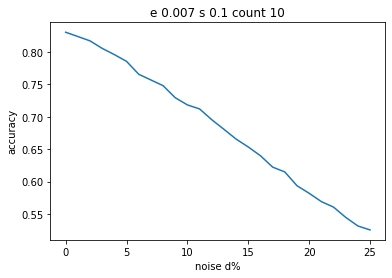

In [ ]:
#ノイズを0%から25%加えた
d=[]
accuracy=[]
for i in range(26):
  noise_data = random_d(i)
  d.append(i)
  accuracy.append(test(noise_data))
  #print('d={}%,acc={}'.format(i,test(noise_data)))

noise_data = random_d(0)
print('ノイズがないとき')
print(test(noise_data))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(d,accuracy)
plt.title("e {} s {} count {}".format(e,s,count))
plt.xlabel("noise d%")
plt.ylabel("accuracy")
plt.show()  

In [ ]:
e0.005s0.1count50 0.8296
e0.005s0.1count20 0.842
e0.005s0.1count10 0.8208
e0.005s0.1count5  0.8026
e0.005s0.1count3  0.7147
e0.005s0.1count1  0.7462

e0.005s0.001count10 0.8507
e0.005s0.005count10 0.8561
e0.005s0.01count10  0.8196
e0.005s0.05count10  0.858
e0.005s0.5count10   0.5564

e0.001s0.1count10 0.7906
e0.003s0.1count10 0.8354
e0.007s0.1count10 0.8303
e0.01s0.1count10  0.8224
それぞれのパターンでの正解率を表している。